In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="darkgrid")

In [3]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape, test.shape

((891, 12), (418, 11))

In [7]:
# get some information on the dataset to see how many cateogorical columns and how many numerical columns are there

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory data analysis

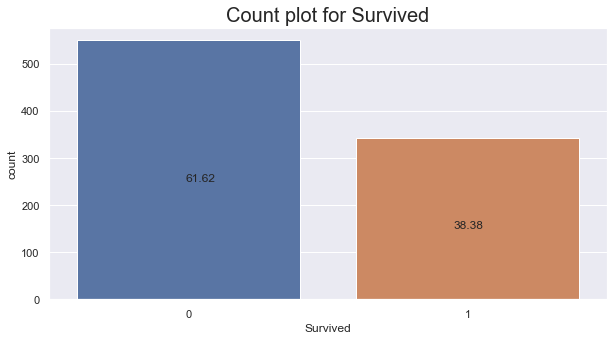

In [103]:
# Let us first check the count of how many survived. 
plt.figure(figsize=(10,5))
sns.countplot(train['Survived'])
plt.title('Count plot for Survived', size = 20)
plt.text(x=-0.01, y =250, s = round(train['Survived'].value_counts(normalize = True)[0]*100,2))
plt.text(x=0.95, y =150, s = round(train['Survived'].value_counts(normalize = True)[1]*100,2))
plt.show()

#### We can see 61 % percent the total population did not survive and 38% did survive. 

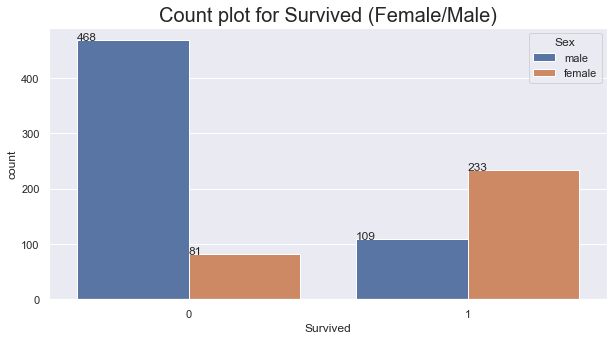

In [104]:
# Out of the survived and non survived, how many of them are male amd female
plt.figure(figsize=(10,5))
plot = sns.countplot(train['Survived'], hue = train['Sex'])
plt.title('Count plot for Survived (Female/Male)', size = 20)
for p in plot.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    plot.text(txt_x,txt_y,txt)

plt.show()

#### Looks like males had a higher mortality rate than that of the females. Also, the number of females who survived are more than the number of males

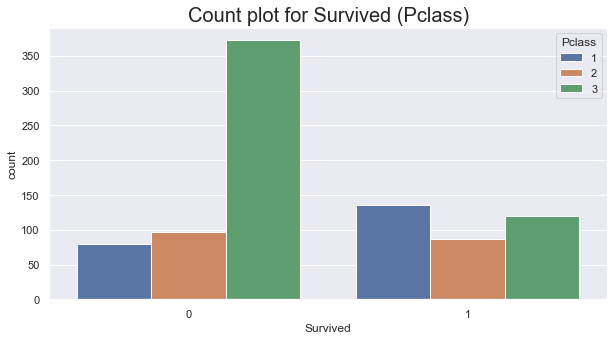

In [105]:
## Now lets look at the passenger class feature and its relation with survive and sex
plt.figure(figsize=(10,5))
plot = sns.countplot(train['Survived'],hue = train['Pclass'])
plt.title('Count plot for Survived (Pclass)', size = 20)
plt.show()

#### The lowest class which is pclass 3 has a higher mortality which is why the survive count is less and also is exactly opposite to that of class 1


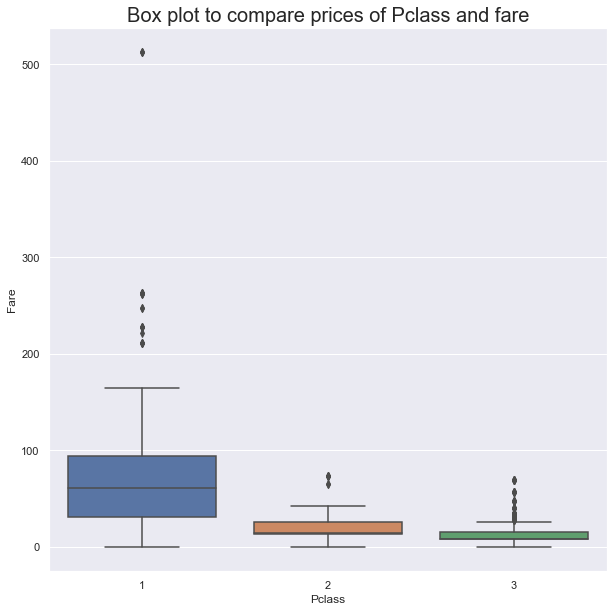

In [106]:
## Lets look at the fare for each class that a passenger paid. 
plt.figure(figsize=(10,10))
sns.boxplot(x=train['Pclass'], y=train['Fare'])
plt.title('Box plot to compare prices of Pclass and fare', size = 20)
plt.show()

#### Pclass 1 has a higher range of ticket fare than compared to pclass 3 which definitely makes sense

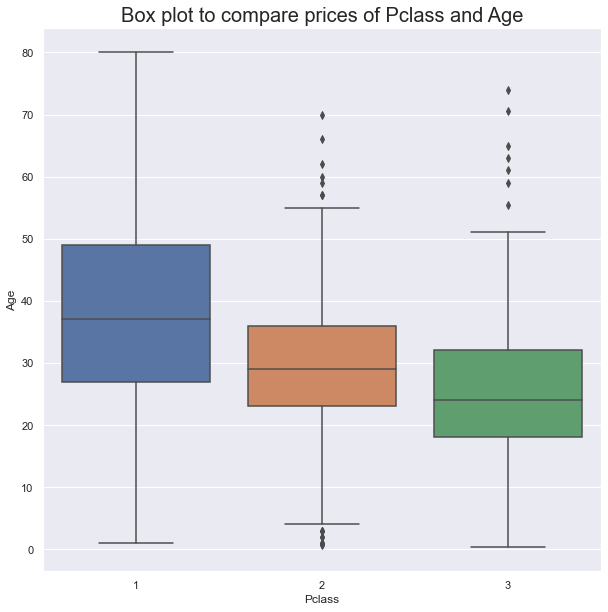

In [107]:
plt.figure(figsize=(10,10))
sns.boxplot(x=train['Pclass'], y=train['Age'])
plt.title('Box plot to compare prices of Pclass and Age', size = 20)
plt.show()

#### We cannot really make an inference out of this as all the classes have all age groups 

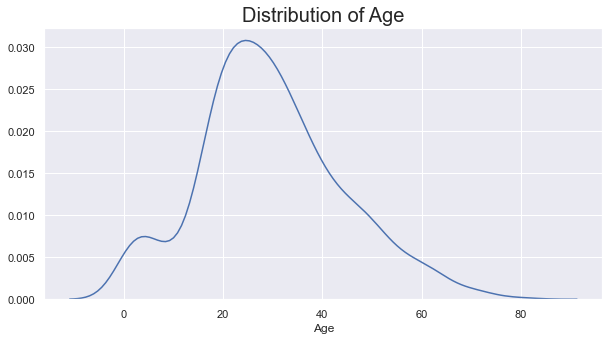

In [108]:
# However lets see the distibution of age
plt.figure(figsize=(10,5))
sns.distplot(train['Age'], hist = False)
plt.title('Distribution of Age', size = 20)
plt.show()

#### Most of the passengers on board were young within the age 15 to 40. 

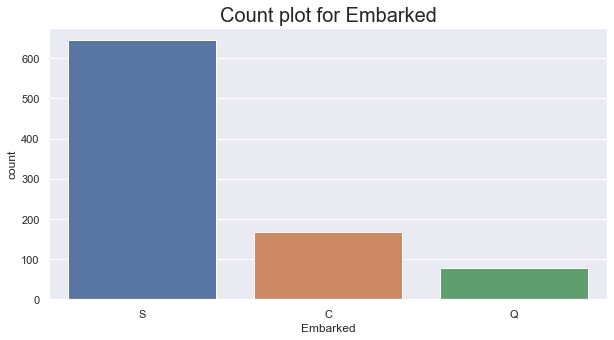

In [109]:
## Lets check from which place did most of the passengers begin their journey
plt.figure(figsize=(10,5))
plot = sns.countplot(train['Embarked'])
plt.title('Count plot for Embarked', size = 20)
plt.show()


#### Most passengers started thier journey from Southampton

## Data Cleaning

#### Train data

In [8]:
# Null values

train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
## We shall drop the cabin column, drop rows for Embarked and impute for age

train = train.drop('Cabin', 1)

In [10]:
## We shall impute random values for age column

age_random = train['Age'].dropna().sample(train['Age'].isnull().sum())

In [11]:
age_random.index = train[train['Age'].isnull()]['Age'].index

In [12]:
train.loc[train['Age'].isnull(),'Age'] = age_random

In [13]:
## drop rest of the nan values

train = train.dropna()

# count the null values again
train.isnull().sum().sum()

0

In [14]:
## Dropping unwanted columns 
train = train.drop(['PassengerId','Name','Ticket'], 1)

In [15]:
## Since we are applying logistic regression it would make sense to convert numerical categorical columns from int to object

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
train[['Survived','Pclass']] = train[['Survived','Pclass']].astype('object')

In [17]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
## Encoding categorical features

train = pd.get_dummies(train,columns=['Survived','Pclass','Sex','Embarked'], drop_first=True)

In [19]:
train.isnull().sum()

Age           0
SibSp         0
Parch         0
Fare          0
Survived_1    0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [20]:
fare_mean = train['Fare'].mean()
fare_std = train['Fare'].std()
fare_mean, fare_std

(32.09668087739029, 49.69750431670801)

In [21]:
train['Fare'] = (train['Fare'] - fare_mean) / fare_std
train.head()

,Age,SibSp,Parch,Fare,Survived_1,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,-0.499958,0,0,1,1,0,1
1,38.0,1,0,0.788503,1,0,0,0,0,0
2,26.0,0,0,-0.486376,1,0,1,0,0,1
3,35.0,1,0,0.422623,1,0,0,0,0,1
4,35.0,0,0,-0.483861,0,0,1,1,0,1


#### Test data

In [23]:
# Null values

test.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
## We shall drop the cabin column, impute for age and fare

test = test.drop('Cabin', 1)

In [25]:
## We shall impute random values for age column

age_random = test['Age'].dropna().sample(test['Age'].isnull().sum())

In [26]:
age_random.index = test[test['Age'].isnull()]['Age'].index

In [27]:
test.loc[test['Age'].isnull(),'Age'] = age_random

In [28]:
## impute fare

test['Fare']= test['Fare'].fillna(test['Fare'].mean())

# count the null values again
test.isnull().sum().sum()

0

In [29]:
## Dropping unwanted columns 
test = test.drop(['Name','Ticket'], 1)

In [30]:
test['Pclass'] = test['Pclass'].astype('object')

In [31]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [32]:
## Encoding categorical features

test = pd.get_dummies(test,columns=['Pclass','Sex','Embarked'], drop_first=True)

In [33]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,0,1,1,1,0
1,893,47.0,1,0,7.0000,0,1,0,0,1
2,894,62.0,0,0,9.6875,1,0,1,1,0
3,895,27.0,0,0,8.6625,0,1,1,0,1
4,896,22.0,1,1,12.2875,0,1,0,0,1


In [34]:
test['Fare'] = (test['Fare'] - fare_mean) / fare_std
test.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,892,34.5,0,0,-0.488304,0,1,1,1,0
1,893,47.0,1,0,-0.504989,0,1,0,0,1
2,894,62.0,0,0,-0.450912,1,0,1,1,0
3,895,27.0,0,0,-0.471536,0,1,1,0,1
4,896,22.0,1,1,-0.398595,0,1,0,0,1


## Model training

In [35]:
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score, cross_val_predict

In [36]:
X_train = train.drop('Survived_1',1)
y_train = train['Survived_1']

In [37]:
model = LogisticRegression()

model.fit(X_train, y_train)

C:\Users\win10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
X_test = test.iloc[:,1:]
y_pred = model.predict(X_test)

In [39]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## SUBMISSION

In [40]:
sub = pd.DataFrame({'PassengerId':test['PassengerId'],
                    'Survived':y_pred})


In [41]:
sub['Survived']  = sub['Survived'].astype('int')